파이썬 데모

이미지 로드 -> 전처리(rembg) -> 모델 test 

In [44]:
from PIL import Image, ImageOps, ImageFile
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

test1.png의 샤인 머스켓은 맛있다.
test2.png의 샤인 머스켓은 맛있다.
test3.png의 샤인 머스켓은 맛없다.
test4.png의 샤인 머스켓은 맛없다.
test5.png의 샤인 머스켓은 맛있다.


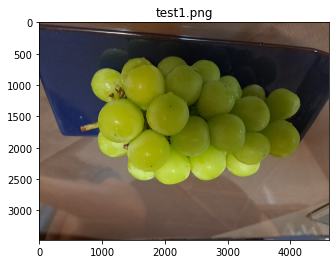

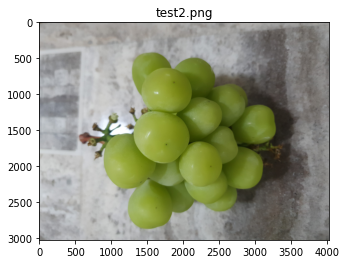

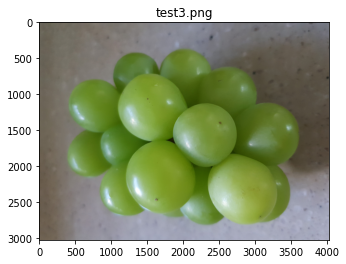

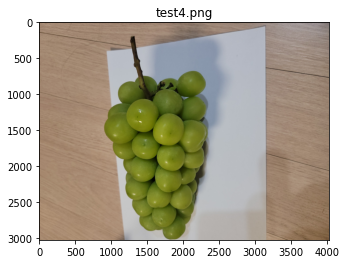

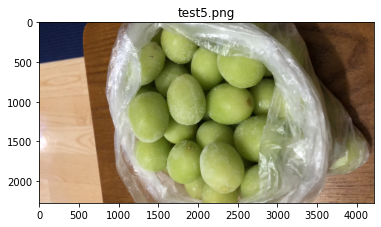

In [50]:
original_model_94 = load_model('model_original_mango_1_94.h5')
for i in range(1,6):
    data_original_94 = np.ndarray(shape=(1, 94, 94, 3), dtype=np.float32)
    image = Image.open(f'./input_original_224/test{i}.jpg')

    plt.figure(i)
    plt.title(f'test{i}.png')
    plt.imshow(image)

    size=(94,94)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)
    
    normed_image_array = np.asarray(image).astype('float32')/255
    data_original_94[0] = normed_image_array
    prediction = original_model_94.predict(data_original_94)
    msg = f'test{i}.png의 샤인 머스켓은 맛있다.' if prediction[0][1] > prediction[0][0] else f'test{i}.png의 샤인 머스켓은 맛없다.'
    print(msg)

test1.png의 샤인 머스켓은 맛있다.
test2.png의 샤인 머스켓은 맛있다.
test3.png의 샤인 머스켓은 맛없다
test4.png의 샤인 머스켓은 맛없다
test5.png의 샤인 머스켓은 맛있다.


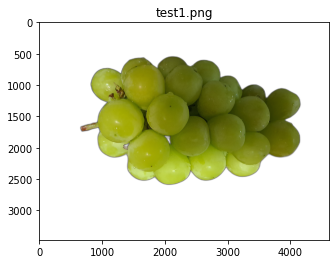

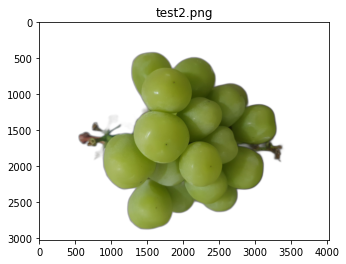

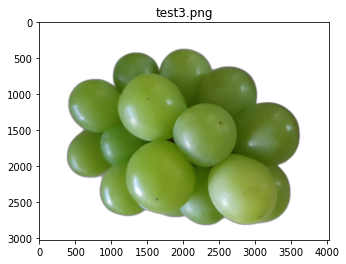

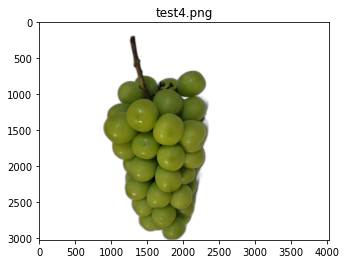

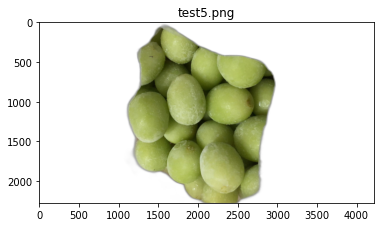

In [51]:
from rembg.bg import remove
import io

rembg_model_94 = load_model('model_rembg_mango_1_94.h5')
for i in range(1,6):
    input_path = f'./input_original_224/test{i}.jpg'
    output_path = f'./input_after_rembg/test{i}.png'
    
    # Uncomment the following line if working with trucated image formats (ex. JPEG / JPG)
    ImageFile.LOAD_TRUNCATED_IMAGES = True

    f = np.fromfile(input_path)
    result = remove(f)
    img = Image.open(io.BytesIO(result)).convert("RGBA")
    img.save(output_path)

    data_rembg_94 = np.ndarray(shape=(1, 94, 94, 4), dtype=np.float32)
    image = Image.open(f'./input_after_rembg/test{i}.png')
    plt.figure(i)
    plt.title(f'test{i}.png')
    plt.imshow(image)
    size=(94,94)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)
    normed_image_array = np.asarray(image).astype('float32')/255
    data_rembg_94[0] = normed_image_array
    prediction = rembg_model_94.predict(data_rembg_94)
    print(f'test{i}.png의 샤인 머스켓은 맛있다.' if prediction[0][1] > prediction[0][0] else f'test{i}.png의 샤인 머스켓은 맛없다' )

test1.png의 샤인 머스켓은 맛있다.
test2.png의 샤인 머스켓은 맛없다
test3.png의 샤인 머스켓은 맛있다.
test4.png의 샤인 머스켓은 맛있다.
test5.png의 샤인 머스켓은 맛있다.


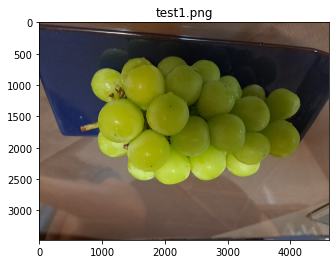

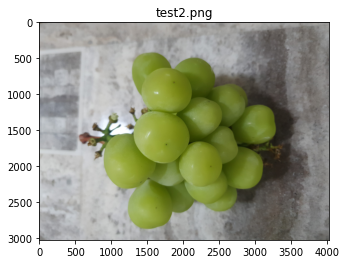

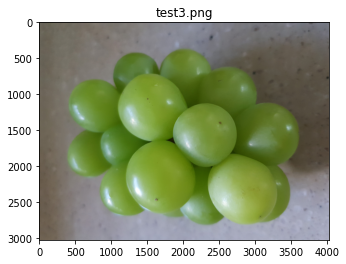

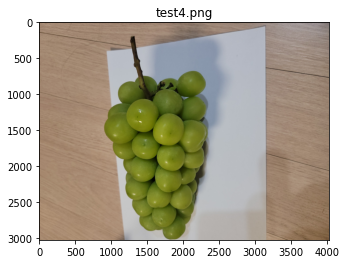

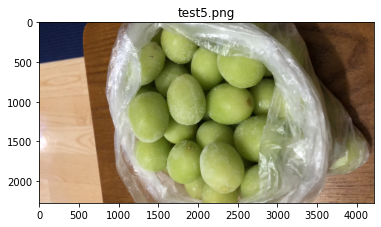

In [52]:
transfer_model_224 = load_model('transfer_model_original_sweetness_1_224.h5')
for i in range(1,6):
    data_original_224 = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    image = Image.open(f'./input_original_224/test{i}.jpg')
    plt.figure(i)
    plt.title(f'test{i}.png')
    plt.imshow(image)
    size=(224,224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)
    normed_image_array = np.asarray(image).astype('float32')/255
    data_original_224[0] = normed_image_array
    prediction = transfer_model_224.predict(data_original_224)
    print(f'test{i}.png의 샤인 머스켓은 맛있다.' if prediction[0][1] < prediction[0][0] else f'test{i}.png의 샤인 머스켓은 맛없다')